In [75]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib as plt
import seaborn as sns

In [80]:
df = pd.read_csv('Data-Collisions.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [83]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


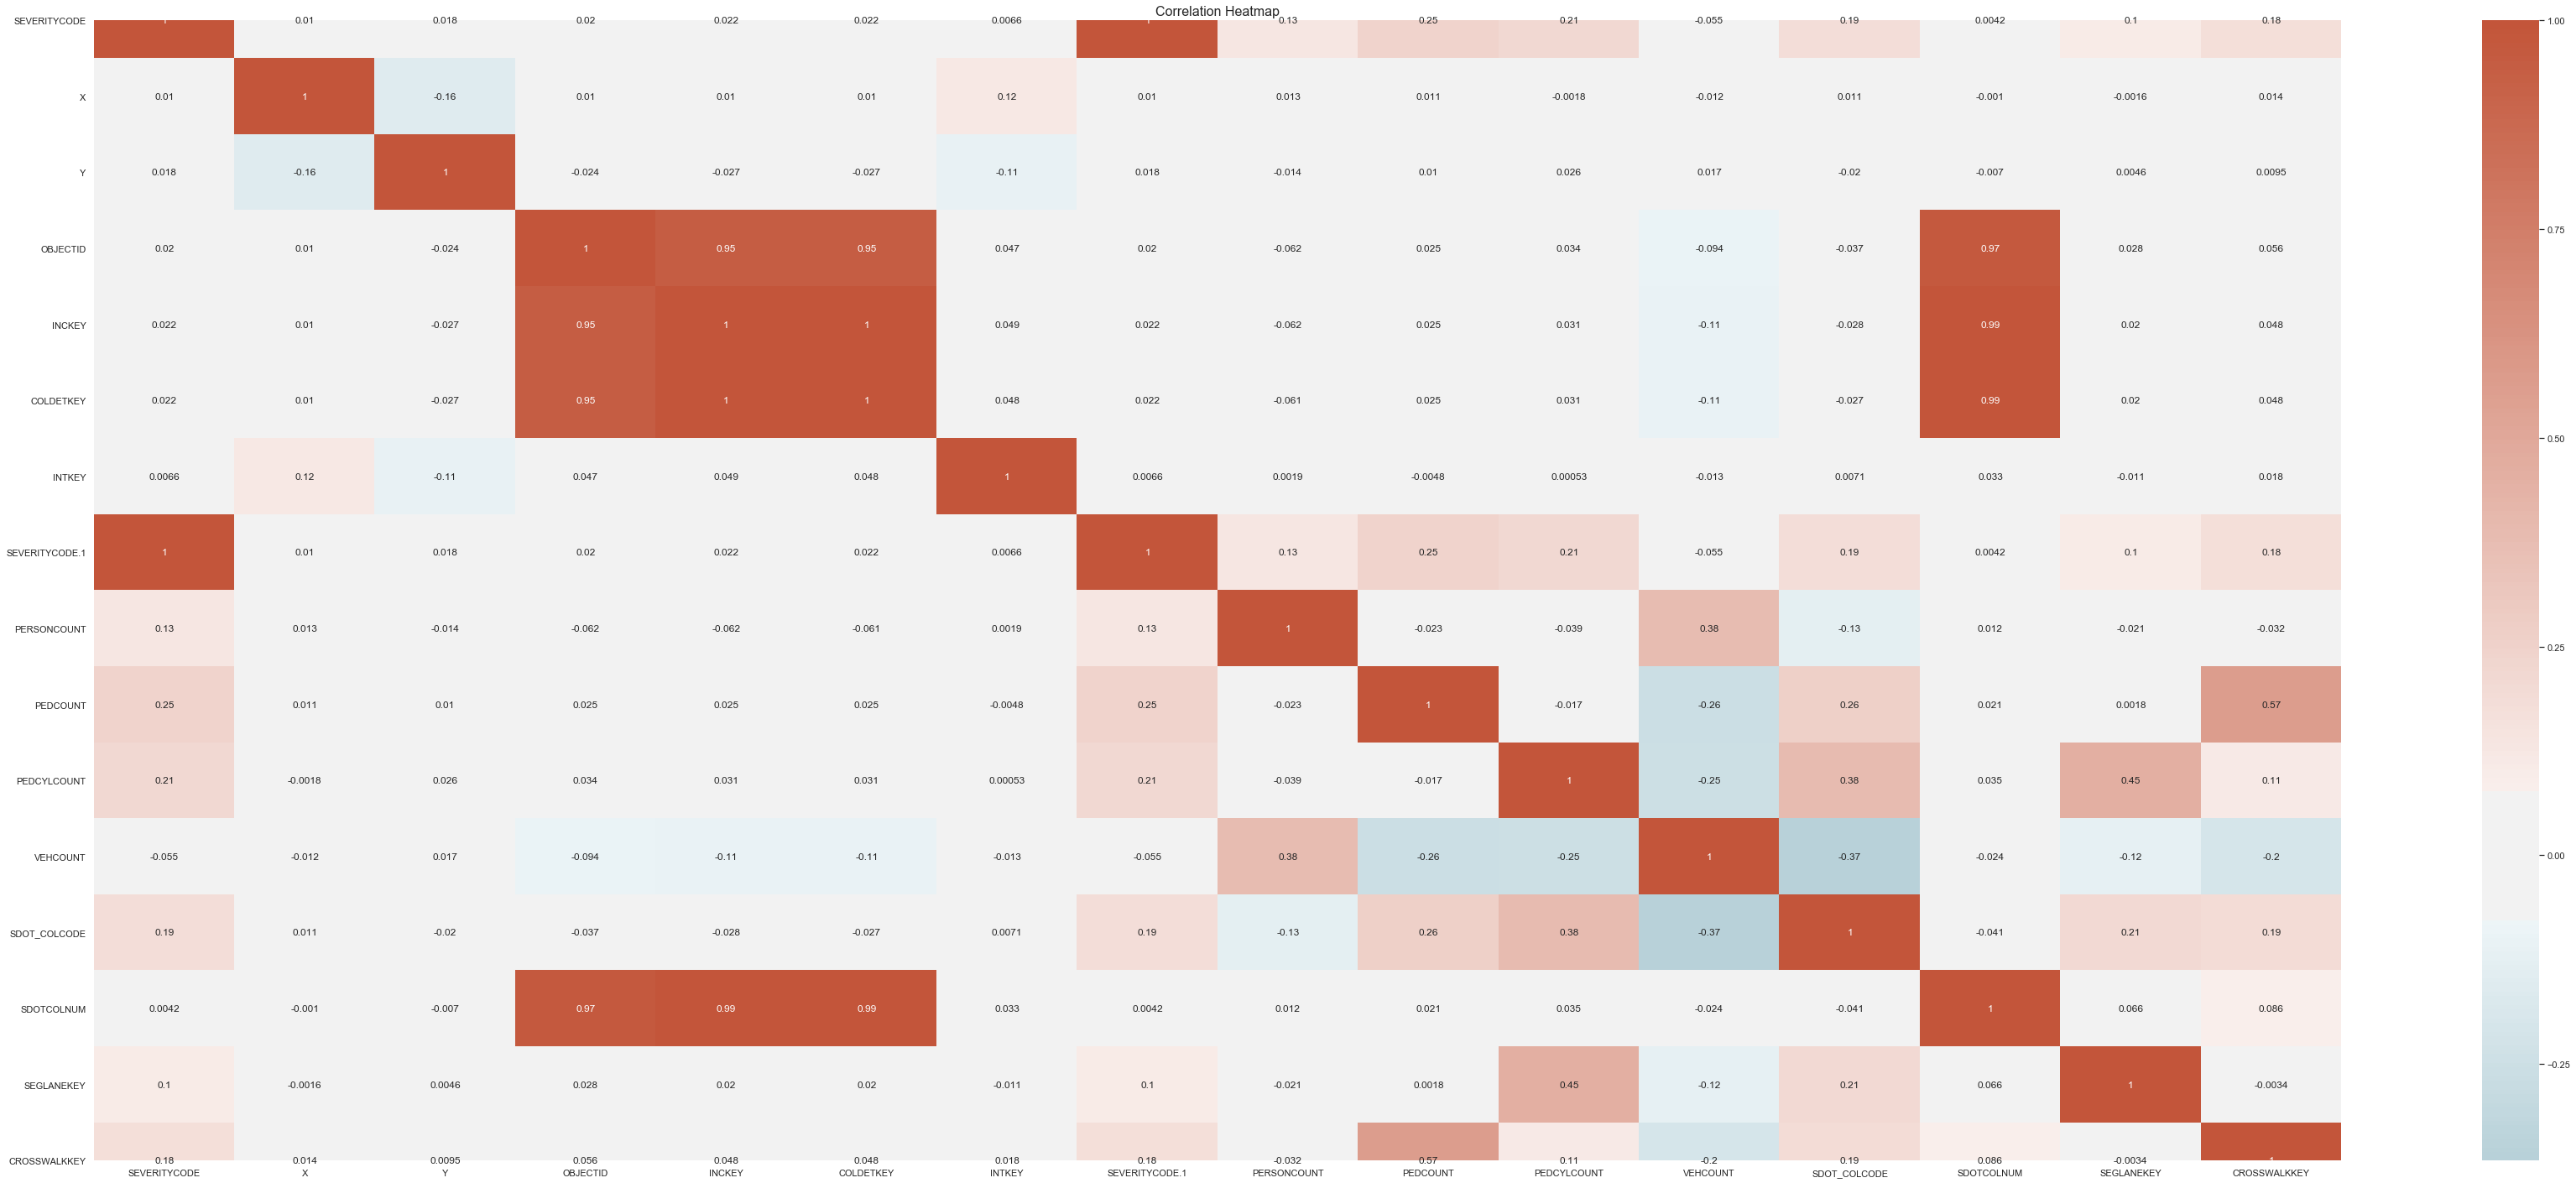

In [87]:
df['SEVERITYCODE'] = df['SEVERITYCODE'].astype(int)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=16)
sns.set(rc={'figure.figsize':(60,25)})

In [51]:
#Dropping columns that useful

df = df.drop(['OBJECTID', 'X', 'Y', 'INCKEY', 'STATUS','COLDETKEY', 'LOCATION','REPORTNO','INTKEY','EXCEPTRSNCODE','SEVERITYCODE.1','PERSONCOUNT','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR','ST_COLCODE','SDOTCOLNUM','PEDROWNOTGRNT','INATTENTIONIND','EXCEPTRSNDESC','SEVERITYDESC','INCDATE','INCDTTM','SDOT_COLCODE','UNDERINFL'],axis=1)


In [52]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC
0,2,Intersection,Angles,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight,NaN,Entering at angle
1,1,Block,Sideswipe,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,NaN,From same direction - both going straight - bo...
2,1,Block,Parked Car,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Dry,Daylight,NaN,One parked--one moving
3,1,Block,Other,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,NaN,From same direction - all others
4,2,Intersection,Angles,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,NaN,Entering at angle


In [53]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False


In [54]:
for attribute in missing_data.columns.values.tolist():
    print(attribute)
    print (missing_data[attribute].value_counts())
    print()

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLDESC
False    194673
Name: SDOT_COLDESC, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64

ST_COLDESC
False    189769
True       4904
Name: ST_COLDESC, dtype: int64



In [55]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [56]:
#SPEEDING has a lot of missing data. But it can be seen all the data present in SPEEDING are yes - so - all missing data are No

In [57]:
df['SPEEDING'] = df['SPEEDING'].fillna('n')

In [58]:
df

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC
0,2,Intersection,Angles,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight,n,Entering at angle
1,1,Block,Sideswipe,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,n,From same direction - both going straight - bo...
2,1,Block,Parked Car,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Dry,Daylight,n,One parked--one moving
3,1,Block,Other,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,n,From same direction - all others
4,2,Intersection,Angles,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,n,Entering at angle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,Block,Head On,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,n,From opposite direction - both moving - head-on
194669,1,Block,Rear Ended,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Wet,Daylight,n,From same direction - both going straight - bo...
194670,2,Intersection,Left Turn,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,n,From opposite direction - one left turn - one ...
194671,2,Intersection,Cycles,0,1,1,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Dry,Dusk,n,Vehicle Strikes Pedalcyclist


In [59]:
#now drop rows with any NaN value

In [60]:
df.dropna(inplace=True)

In [61]:
df['SEVERITYCODE'].value_counts()

1    126270
2     56625
Name: SEVERITYCODE, dtype: int64

In [62]:
#balance the data
df_1 = df[df['SEVERITYCODE']==1]
df_2 = df[df['SEVERITYCODE']==2]

df_1 = df_1.sample(n=56625)

df_1.reset_index(drop=True, inplace=True)
df_2.reset_index(drop=True, inplace=True)

In [63]:
df_balanced = pd.concat([df_1,df_2])
df_balanced.reset_index(drop=True, inplace=True)
df_balanced

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC
0,1,Block,Other,0,0,1,Mid-Block (but intersection related),MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,Clear,Dry,Daylight,n,Fixed object
1,1,Block,Parked Car,0,0,2,Mid-Block (but intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Clear,Dry,Dark - Street Lights On,n,One parked--one moving
2,1,Intersection,Angles,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,n,Entering at angle
3,1,Block,Rear Ended,0,0,2,Driveway Junction,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Clear,Dry,Dawn,n,From same direction - both going straight - bo...
4,1,Block,Parked Car,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Clear,Dry,Daylight,n,One parked--one moving
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113245,2,Block,Angles,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,n,Entering at angle
113246,2,Block,Angles,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Wet,Daylight,n,Entering at angle
113247,2,Block,Head On,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,n,From opposite direction - both moving - head-on
113248,2,Intersection,Left Turn,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,n,From opposite direction - one left turn - one ...


In [64]:
df_balanced['SEVERITYCODE'].value_counts()

2    56625
1    56625
Name: SEVERITYCODE, dtype: int64

In [65]:
#also replace 1 with 0 and 2 with 1
df["SEVERITYCODE"].replace({1: 0, 2: 1}, inplace=True)

In [66]:
df_balanced

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC
0,1,Block,Other,0,0,1,Mid-Block (but intersection related),MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,Clear,Dry,Daylight,n,Fixed object
1,1,Block,Parked Car,0,0,2,Mid-Block (but intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Clear,Dry,Dark - Street Lights On,n,One parked--one moving
2,1,Intersection,Angles,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,n,Entering at angle
3,1,Block,Rear Ended,0,0,2,Driveway Junction,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Clear,Dry,Dawn,n,From same direction - both going straight - bo...
4,1,Block,Parked Car,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Clear,Dry,Daylight,n,One parked--one moving
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113245,2,Block,Angles,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,n,Entering at angle
113246,2,Block,Angles,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Wet,Daylight,n,Entering at angle
113247,2,Block,Head On,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,n,From opposite direction - both moving - head-on
113248,2,Intersection,Left Turn,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,n,From opposite direction - one left turn - one ...


In [67]:
used_columns = ['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','SDOT_COLDESC','ST_COLDESC']

In [68]:
X = df_balanced[used_columns].values
Y = df_balanced['SEVERITYCODE'].values

In [69]:
#convert text labels to numeric encoded values
i = 0
for col in used_columns:
    unique_values = df[col].unique().tolist()
    le = preprocessing.LabelEncoder()
    le.fit(unique_values)
    X[:, i] = le.transform(X[:, i])

    i += 1
    

In [70]:
#apply standard scalar
std_scal = preprocessing.StandardScaler()
sc = std_scal.fit(X)
X = sc.transform(X)

In [71]:
t = DecisionTreeClassifier(criterion="entropy", max_depth = 20)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,shuffle=True)

In [72]:
print(X_train.shape, X_test.shape)

(101925, 12) (11325, 12)


In [73]:
t.fit(X_train,Y_train)
Yhat = t.predict(X_test)

print("F1 score: ", metrics.f1_score(Y_test, Yhat))

F1 score:  0.680907372400756
